## Example: temperature statistics in Stockholm

We will use the `numpy` library on the case of daytime temperature data in Stockholm. Data includes metrics for each day between 1800 and 2011. They are stored in a file where the lines represent measurements. Individual data - year, month, day and measured temperature - are separated by comma.

In [1]:
from csv import DictReader

fp = open('podatki/stockholm.csv', 'rt')
reader = DictReader(fp)

for row in reader:
    print(row)
    break  # izpisi samo prvo vrstico

OrderedDict([('Year', '1800'), ('Month', '1'), ('Day', '1'), ('Temp', '-6.1')])


Presenting data in the form of a dictionary is useful for its clarity, but the calculation will be much faster,
if we load the data as an array.

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

data = np.loadtxt('podatki/stockholm.csv', delimiter=",", skiprows=1)
data

array([[ 1800. ,     1. ,     1. ,    -6.1],
       [ 1800. ,     1. ,     2. ,   -15.4],
       [ 1800. ,     1. ,     3. ,   -15. ],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

Check the data size: the number of lines (_measurements_, _samples_) and the number of columns (_attributes_).

In [3]:
data.shape

(77431, 4)

Columns store data in this order: `year`, `month`, `day` and `temperature`.

Let's take a look at all the measurements made in 2011. We create the binary vector `data [:, 0] == 2011`, which contains the `True` value on the relevant positions and is used to address the data.

In [4]:
data[data[:, 0] == 2011]

array([[ 2011. ,     1. ,     1. ,    -2.3],
       [ 2011. ,     1. ,     2. ,    -3.6],
       [ 2011. ,     1. ,     3. ,    -6.9],
       ..., 
       [ 2011. ,    12. ,    29. ,     4.9],
       [ 2011. ,    12. ,    30. ,     0.6],
       [ 2011. ,    12. ,    31. ,    -2.6]])

##### Question 1-2-1

Print out the temperature 200 years ago, for example, the temperature on December 5, 1817.

[Answer](resitve_01-2_podatki_temperatura.ipynb#odgovor-1-2-1)

### Data Processing

Let's introduce operations that tell us something about the data. We will calculate some basic statistics.

#### Average, arithmetic mean

Daily temperature is in column with index 3 (fourth column). Calculate the average of all measurements.

In [5]:
np.mean(data[:, 3])

6.1971096847515854

We find that the average daily temperature in Stockholm over the past 200 years was pleasant 6.2 C.

##### Question 1-2-2

What is the average temperature in January (month with the number '1')?

[Answer] (solutions _01-2_ data_temperature.ipynb # response-1-2-2)

#### Standard deviation and variance

In [6]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

##### Question 1-2-3

In what month is the temperature deviation the biggest?

In [7]:
# Poišči mesec z največjim odklonom oz. varianco v temperaturi.
# Namig: zgradi seznam terk oblike (odklon v temperaturi, mesec)
# ...

[Answer] (solutions _01-2_ data_temperature.ipynb # response-1-2-3)

#### Minimum and maximum value

Let's find the lowest daily temperature:

In [8]:
data[:,3].min()

-25.800000000000001

Let's find the highest daily temperature:

In [9]:
data[:,3].max()

28.300000000000001

##### Question 1-2-4

The month and year when the maximum temperature was recorded.

In [10]:
# Poišči mesec in leto, kjer smo v povprečju beležili najvišjo temperaturo.
# Namig: zgradi seznam terk oblike (povprecna temperatura, (leto, mesec))
# ...

[Answer] (solutions _01-2_ data_temperature.ipynb # response-1-2-4)

#### Sum, product

Temperature is usually not summed up. Nevertheless, take the opportunity to see the functions of the sum and the product.

In [11]:
data[:, 3].sum()  # vsota vseh temperatur

479848.40000000002

In [12]:
data[:, 3].sum() / data.shape[0]   # dobimo ravno aritmetično sredino

6.1971096847515854

In [13]:
# prva vrstica v podatkih ...
data[0, :]

array([ 1800. ,     1. ,     1. ,    -6.1])

In [14]:
# ... in njen produkt
np.prod(data[0, :])

-10980.0

### Global warming?

Let's answer a few more questions. According to Stockholm, the rumors circulate that the temperature is increasing from year to year.

In [15]:
# Izračunajmo povprečno temperaturo za vsako leto posebej 
letna_povprečja = dict()

for leto in range(1800, 2012):
    # Uporabimo pogojno naslavljanje polja
    letna_povprečja[leto] = data[data[:, 0] == leto, 3].mean()

##### Question 1-2-5

Write years when the average temperature is higher than last year.

In [16]:
# Izpiši vsako leto, ki ima večjo povprečno temperaturo od prejšnjega
# 

Find the 10 warmest years.

In [17]:
# Poišči 10 najtoplejših let
# 

[Answer] (solutions _01-2_ data_temperature.ipynb # response-1-2-5)

The last years are really suspiciously warm. Try to display data using the matplotlib library.

In [18]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

Let's make a new image (*figure*) and plot the average temperatures against time.

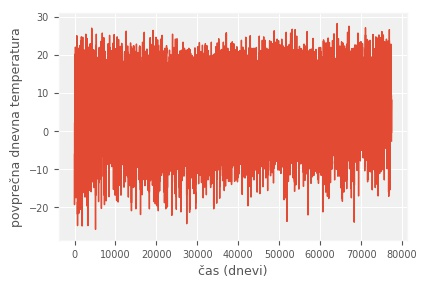

In [19]:
plt.figure()
plt.plot(data[:, 3])
plt.xlabel("čas (dnevi)")  # Vedno označimo osi.
plt.ylabel("povprečna dnevna temperatura");

Quite opaque. Try expanding the image by changing `plt.figure (figsize = (width, height))`, where `height 'and` width' are given in inches or inch (default `(5, 3)`).

However, we observe that the frequency of days with a temperature lower than -20.0 C is decreasing. Let's see.

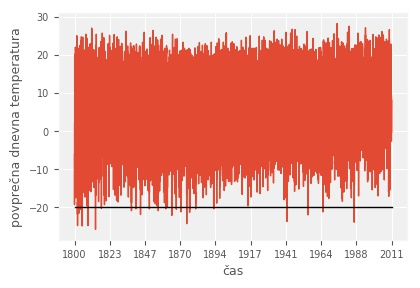

In [20]:
plt.figure()

# Narišimo izvirne podatke
plt.plot(data[:, 3])

# Z vodoravno črto označimo -20.0 C.
plt.plot([0, len(data)], [-20, -20], color="black")   

# Spremenimo še oznako x-osi. Dodajmo 10 enako oddaljenih kazalcev.
ticks = np.arange(0, len(data), len(data)//9, dtype=int)
plt.xticks(ticks)
plt.gca().set_xticklabels(data[ticks, 0].astype(int))

# Vedno označimo osi.
plt.xlabel("čas")  
plt.ylabel("povprečna dnevna temperatura")
plt.show()

From the 80s of the last century, we really did not have any particular cold days. However, we would like to further simplify the display. Let's show each year with one point, which should show the average temperature of the year.

##### Question 1-2-6

Draw a picture of the average annual temperature. Use the `plt.plot (x, y)` function where `x` is the vector of years, and` y` is the vector of the corresponding average temperatures. Do you think the temperature really grows over the years?

In [21]:
# Pomagaj si s letna_povprečja.
# Os x: leto
# Os y: povprečna letna temperatura
# ...

[Answer] (solutions _01-2_ data_temperature.ipynb # response-1-2-6)